In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
from main import DCTrader

In [7]:
ticker = 'ORCL'

start_train = '2020-01-01'
end_train = '2024-01-01'

start_test = '2024-01-02'
end_test = '2025-12-01'

# Crear
trader = DCTrader(ticker, 
                  start_date=start_train, 
                  end_date=end_train, 
                  is_train=True)

Loading data for ORCL...
ORCL: 1006 loaded days | 2020-01-02 to 2023-12-29
Precomputation of signals completed.
DCEnsembleModel initialized:
  - Strategies: 8
  - Thresholds: 10
  - Trainable weights: 70 (of 80 possible)


#### 2.3.1 ENTRENAMIENTO

In [8]:

trader.train(method='GA', 
            pop_size=300,          # mayor diversidad
            n_gen=150,             # más tiempo para converger
            cxpb=0.7,              # menos explotación vía crossover
            mutpb=0.25,            # más introducción de novedades
            indpb=0.2,             # si aplica mutación por gen
            tournsize=2            # menor presión selectiva
            )

# Guardar el mejor modelo
trader.save_model()

Starting training with GA...
Iniciando entrenamiento GA | Población: 300 | Generaciones: 150
Dimensión de pesos: 70
Gen   1 | Fit: 0.152
Gen  10 | Fit: 1.072
Gen  20 | Fit: 1.592
Gen  30 | Fit: 1.592
Gen  40 | Fit: 1.645
Gen  50 | Fit: 1.725
Gen  60 | Fit: 1.767
Gen  70 | Fit: 1.767
Gen  80 | Fit: 1.767
Gen  90 | Fit: 1.767
Gen 100 | Fit: 1.767
Gen 110 | Fit: 1.767
Gen 120 | Fit: 1.767
Gen 130 | Fit: 1.767
Gen 140 | Fit: 1.767
Gen 150 | Fit: 1.767

Entrenamiento GA completado | Mejor fitness: 1.7674
Pesos óptimos asignados al modelo.
Training completed. Optimal weights assigned to the model.
Running backtest...
Backtest completed → RoR: 402.21% | SR: 1.667 | Trades: 55
Model saved to ../persistency/ORCL_model.pkl


Se observa que la función fitness aumenta conforme se avanza en las generaciones. Se deduce asi que también lo hacen el SR asi como el RoR.

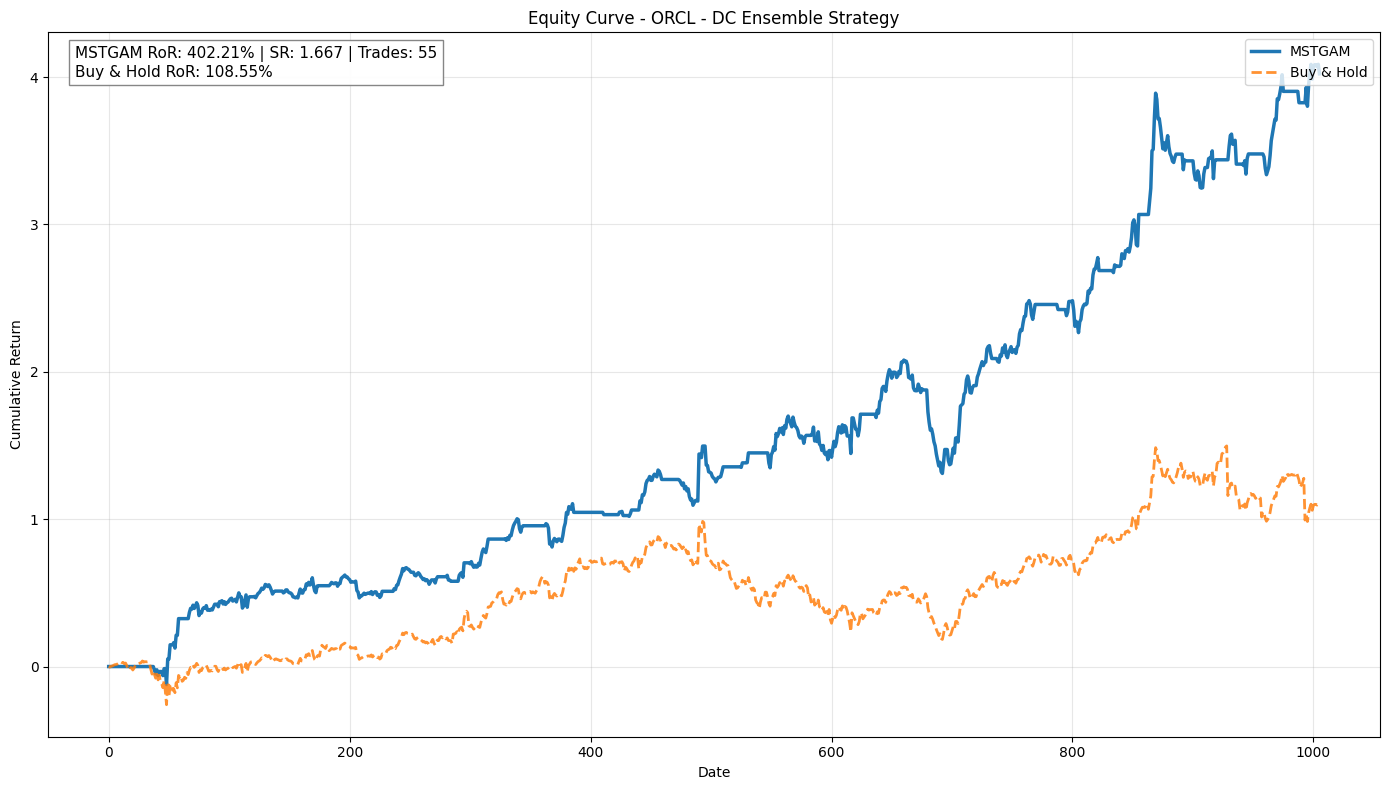

In [9]:
# Ver resultados
trader.plot_equity()

Evaluamos cuales son los pesos de cada par (strategia, threshold). Esto nos permite ver que combinaciones son más eficiente.

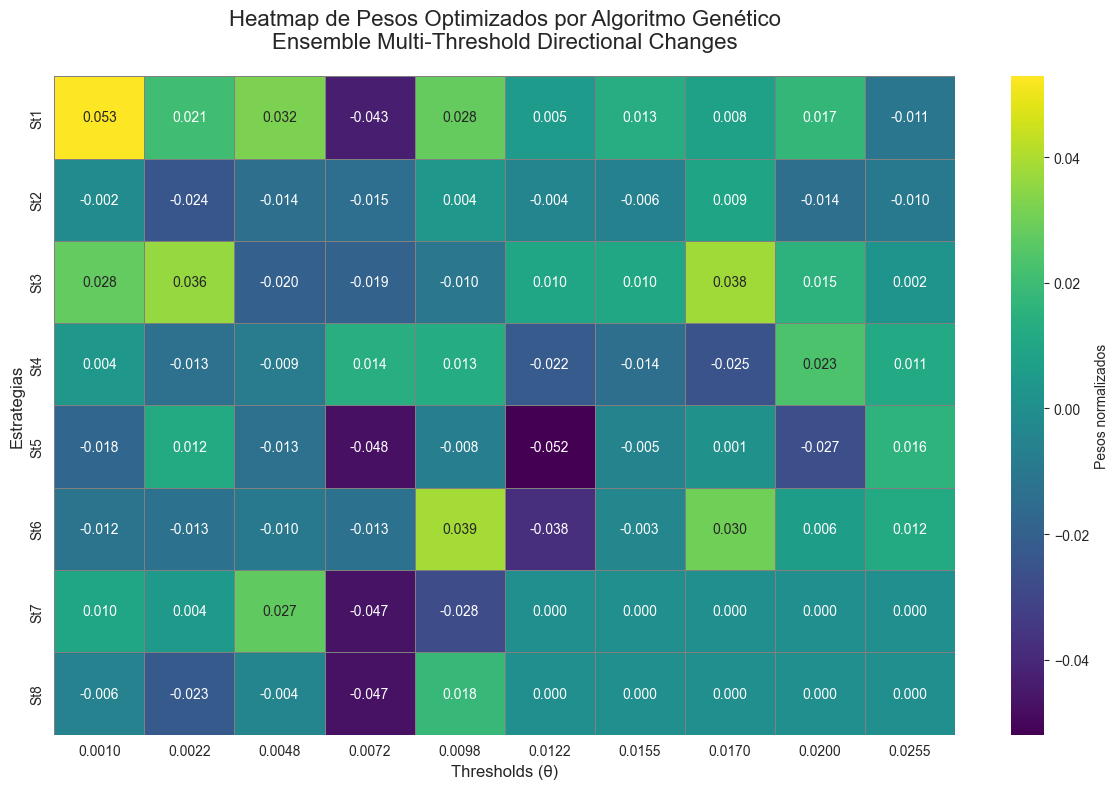

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Obtener la matriz de pesos (n_strats x n_ths)
weights = trader.model.weights  # shape: (8, 10)

# Nombres para los ejes
strategy_names = [f'St{i+1}' for i in range(weights.shape[0])]
threshold_values = [f'{th:.4f}' for th in trader.extractor.thresholds]  # valores reales de theta

# Configuración general de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# =====================================================
# Heatmap de pesos completos
# =====================================================
plt.figure(figsize=(12, 8))
sns.heatmap(
    weights,
    annot=True,
    fmt='.3f',
    cmap='viridis',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Pesos normalizados'},
    xticklabels=threshold_values,
    yticklabels=strategy_names,
    annot_kws={"size": 10}
)

plt.title('Heatmap de Pesos Optimizados por Algoritmo Genético\n'
          'Ensemble Multi-Threshold Directional Changes',
          fontsize=16, pad=20)
plt.xlabel('Thresholds (θ)', fontsize=12)
plt.ylabel('Estrategias', fontsize=12)
plt.tight_layout()
plt.show()

#### 2.4 EVALUACIÓN

Loading data for ORCL...
ORCL: 1487 loaded days | 2020-01-02 to 2025-12-01
Precomputation of signals completed.
DCEnsembleModel initialized:
  - Strategies: 8
  - Thresholds: 10
  - Trainable weights: 70 (of 80 possible)
DCEnsembleModel initialized:
  - Strategies: 8
  - Thresholds: 10
  - Trainable weights: 70 (of 80 possible)
Recomputing signals with fixed trained states...
Full model loaded from ../persistency/ORCL_model.pkl
Running backtest...
Backtest completed → RoR: 148.12% | SR: 0.701 | Trades: 82


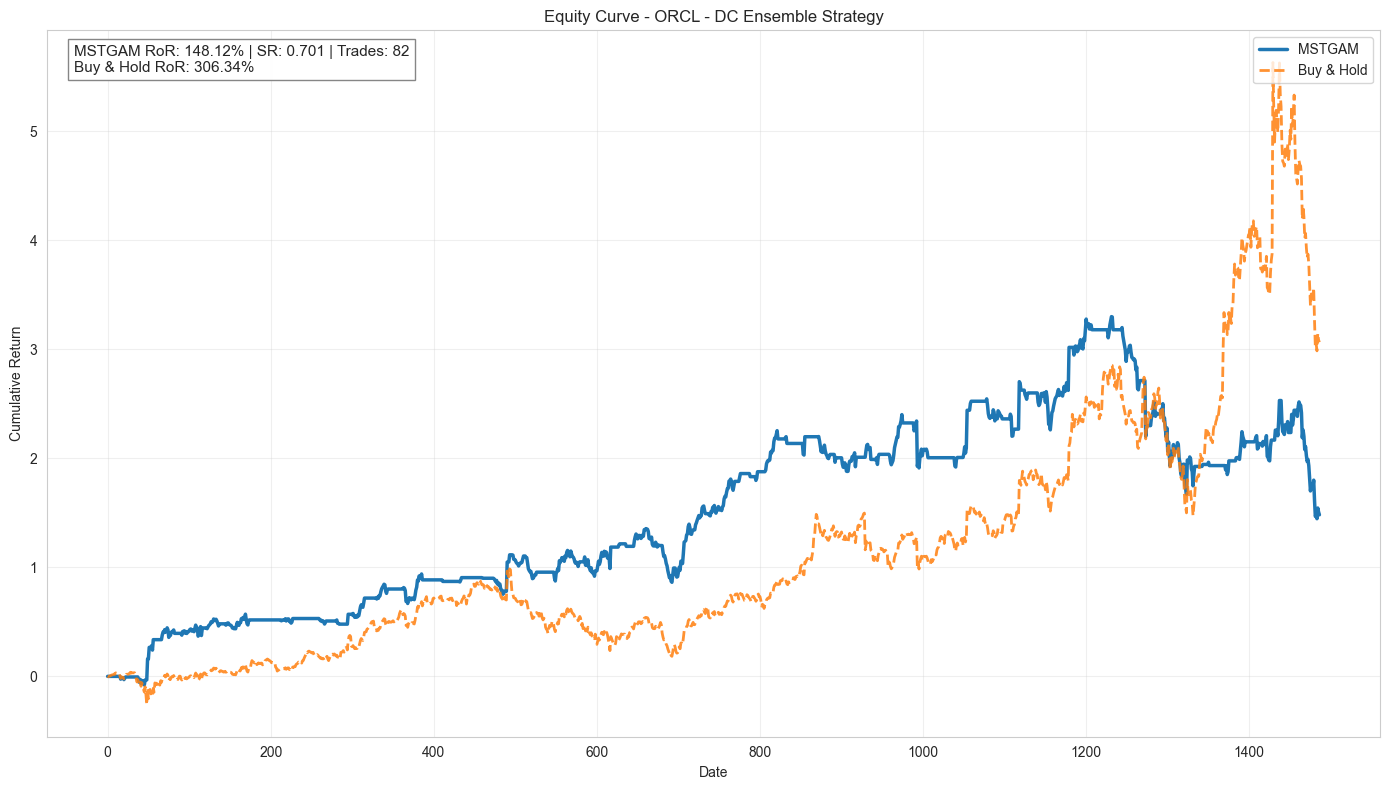

In [11]:
# Cargar el mejor modelo guardado # evaluar en datos de test
trader3 = DCTrader(ticker, start_date=start_train, end_date=end_test)
trader3.load_model()
trader3.plot_equity()

Loading data for ORCL...
ORCL: 481 loaded days | 2024-01-02 to 2025-12-01
Precomputation of signals completed.
DCEnsembleModel initialized:
  - Strategies: 8
  - Thresholds: 10
  - Trainable weights: 70 (of 80 possible)
DCEnsembleModel initialized:
  - Strategies: 8
  - Thresholds: 10
  - Trainable weights: 70 (of 80 possible)
Recomputing signals with fixed trained states...
Full model loaded from ../persistency/ORCL_model.pkl
Running backtest...
Backtest completed → RoR: -31.00% | SR: -0.556 | Trades: 29


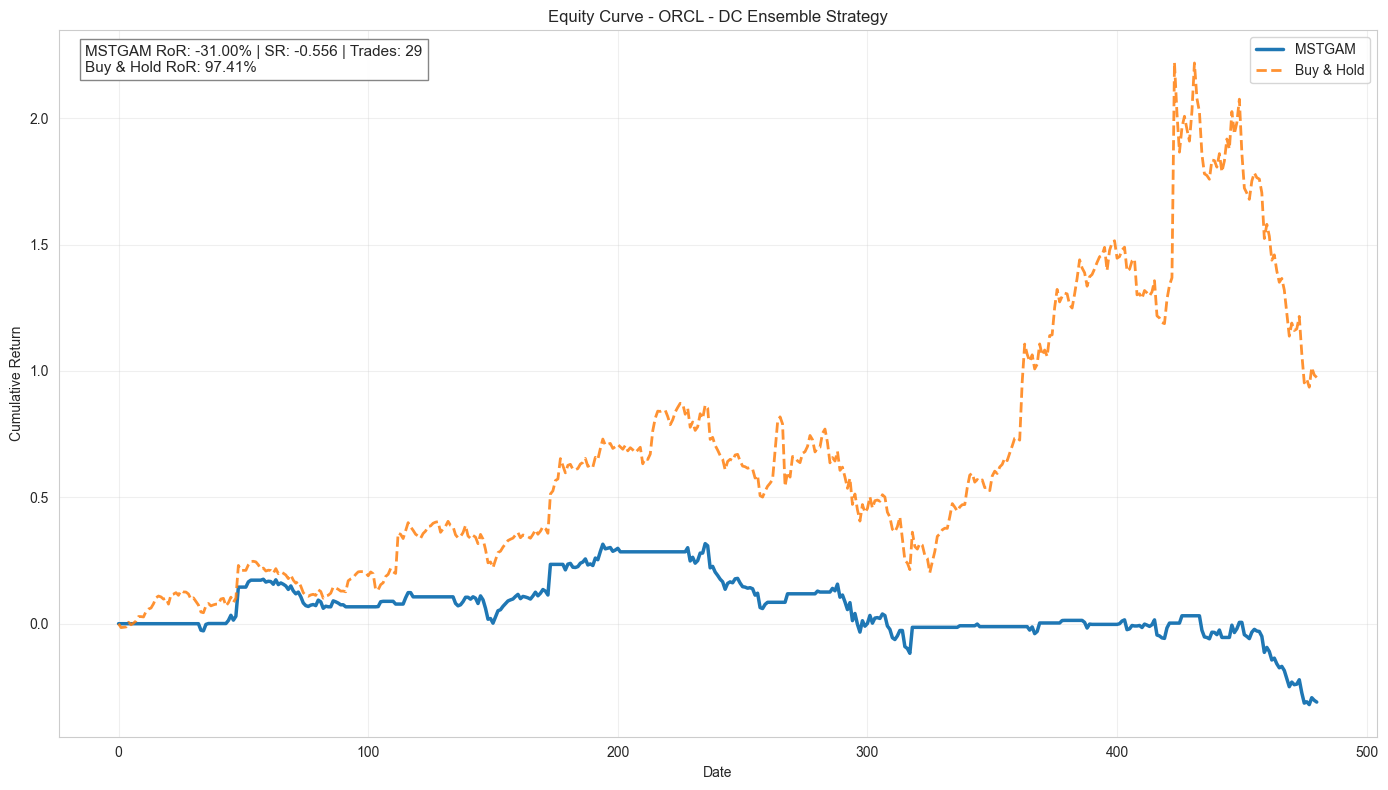

In [13]:
trader4 = DCTrader(ticker, start_date=start_test, end_date=end_test)
trader4.load_model()
trader4.plot_equity()

In [12]:
# Evaluar en datos en vivo (hasta 2025-12-17)

today = '2025-12-17'
trader_live = DCTrader(ticker, end_date='2025-12-17', is_train=False)
trader_live.load_model()
trader_live.get_latest_recommendation()

Loading data for ORCL...
ORCL: 2554 loaded days | 2015-10-19 to 2025-12-12
Precomputation of signals completed.
DCEnsembleModel initialized:
  - Strategies: 8
  - Thresholds: 10
  - Trainable weights: 70 (of 80 possible)
DCEnsembleModel initialized:
  - Strategies: 8
  - Thresholds: 10
  - Trainable weights: 70 (of 80 possible)
Recomputing signals with fixed trained states...
Full model loaded from ../persistency/ORCL_model.pkl
Running backtest...
Backtest completed → RoR: 253.13% | SR: 0.648 | Trades: 120
Recommention for 2025-12-12: BUY if position=False
Recommention for 2025-12-12: HOLD if position=True
